# Students Adaptability Level Prediction

### This is to predict the outcome of Students’ Adaptability Level Prediction in Online Education. This shows Student's Adaptability in school, college and university.

Cleaning and Preparing the data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Importing the dateaset
df= pd.read_csv('/Users/manojnath/Library/Containers/com.microsoft.Excel/Data/Desktop/Onlline edu/students_adaptability_level_online_education.csv')

In [4]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [7]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [9]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [10]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [35]:
df['Gender'].unique()

array([1, 0])

In [28]:
# Handling categorical features Gender
df['Gender'].replace('Girl', 0, inplace= True)
df['Gender'].replace('Boy', 1, inplace= True)

In [29]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2
1,0,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2
2,0,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2
3,0,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2
4,0,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,3


In [16]:
df['Adaptivity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [17]:
df['Adaptivity Level'].replace('Moderate', 2, inplace= True)
df['Adaptivity Level'].replace('Low', 3, inplace= True)
df['Adaptivity Level'].replace('High', 1, inplace= True)

In [18]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2
1,0,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2
2,0,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2
3,0,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2
4,0,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,3


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Adaptivity Level'>

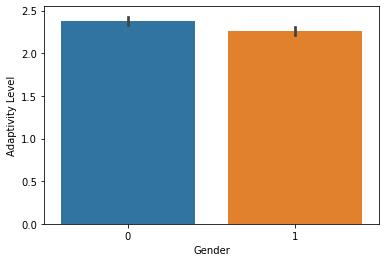

In [21]:
sns.barplot('Gender','Adaptivity Level',data=df)

In [23]:
df['Age'].unique()

array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object)

In [31]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2
1,0,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2
2,0,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2
3,0,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2
4,0,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,3


In [33]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,5,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2
1,0,5,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2
2,0,4,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2
3,0,3,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2
4,0,4,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,4,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,3
1201,0,4,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,2
1202,1,3,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,2
1203,0,4,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,3


In [39]:
fig = px.pie(df, values='Adaptivity Level', names='Education Level', title='Adaptability by Education')
fig.show()

In [45]:
fig=px.histogram(df, 'Age', 'Adaptivity Level', marginal="rug", hover_data=df.columns)
fig.show()

In [46]:
df.to_csv(r'adaptability_level_online_edu.csv')